In [1]:
import pandas as pd
import numpy as np

In [2]:
health_data = pd.read_csv("C:/Users/admin/Desktop/B반_3조_헬스케어/health_data.csv")
health_data.head(15)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
0,2016,5,2,6,11,160.0,50.0,67.0,0.4,0.5,...,130.0,12.8,1.0,0.7,13.0,7.0,20.0,1.0,0,NaN
1,2016,8,2,16,48,155.0,60.0,81.0,0.7,0.5,...,108.0,13.0,1.0,0.7,23.0,14.0,14.0,1.0,0,NaN
2,2016,29,2,9,11,155.0,60.0,83.0,1.0,1.0,...,116.0,12.7,1.0,0.8,21.0,20.0,55.0,1.0,0,NaN
3,2016,41,2,15,28,150.0,45.0,71.0,0.8,0.5,...,135.0,13.0,1.0,0.8,23.0,13.0,18.0,1.0,1,0.0
4,2016,56,2,12,26,145.0,55.0,75.0,1.2,1.2,...,160.0,13.9,1.0,0.7,87.0,246.0,99.0,1.0,0,NaN
5,2016,58,1,8,11,175.0,90.0,95.0,1.5,1.0,...,90.0,14.8,1.0,1.1,26.0,31.0,68.0,3.0,0,NaN
6,2016,68,2,16,46,145.0,40.0,74.0,0.7,0.4,...,182.0,10.6,3.0,0.6,18.0,13.0,16.0,1.0,0,NaN
7,2016,69,1,11,41,170.0,45.0,76.0,1.0,1.0,...,69.0,15.6,1.0,1.1,26.0,12.0,41.0,1.0,1,2.0
8,2016,71,2,8,47,160.0,55.0,89.0,1.5,1.5,...,131.0,11.1,1.0,0.8,19.0,15.0,15.0,1.0,0,NaN
9,2016,88,2,15,48,155.0,40.0,59.0,1.5,1.2,...,116.0,11.0,1.0,0.7,23.0,15.0,17.0,3.0,0,NaN


In [4]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 28 columns):
기준년도           70000 non-null int64
가입자일련번호        70000 non-null int64
성별코드           70000 non-null int64
연령대코드(5세단위)    70000 non-null int64
시도코드           70000 non-null int64
신장(5Cm단위)      69949 non-null float64
체중(5Kg단위)      69949 non-null float64
허리둘레           69987 non-null float64
시력(좌)          69981 non-null float64
시력(우)          69981 non-null float64
청력(좌)          69982 non-null float64
청력(우)          69982 non-null float64
수축기혈압          69992 non-null float64
이완기혈압          69993 non-null float64
식전혈당(공복혈당)     69997 non-null float64
총콜레스테롤         69997 non-null float64
트리글리세라이드       69997 non-null float64
HDL콜레스테롤       69997 non-null float64
LDL콜레스테롤       69819 non-null float64
혈색소            69997 non-null float64
요단백            69654 non-null float64
혈청크레아티닌        69997 non-null float64
(혈청지오티)AST     69997 non-null float64
(혈청지오티)ALT     69997 non-nu

In [6]:
health_data.isnull().sum()

기준년도               0
가입자일련번호            0
성별코드               0
연령대코드(5세단위)        0
시도코드               0
신장(5Cm단위)         51
체중(5Kg단위)         51
허리둘레              13
시력(좌)             19
시력(우)             19
청력(좌)             18
청력(우)             18
수축기혈압              8
이완기혈압              7
식전혈당(공복혈당)         3
총콜레스테롤             3
트리글리세라이드           3
HDL콜레스테롤           3
LDL콜레스테롤         181
혈색소                3
요단백              346
혈청크레아티닌            3
(혈청지오티)AST         3
(혈청지오티)ALT         3
감마지티피              3
흡연상태              18
구강검진 수검여부          0
치석             41700
dtype: int64

In [5]:
health_data.shape

(70000, 28)

In [8]:
health_data.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

기준년도               1
가입자일련번호        70000
성별코드               2
연령대코드(5세단위)       14
시도코드              17
구강검진 수검여부          2
dtype: int64

In [11]:
health_data.select_dtypes('float').apply(pd.Series.nunique, axis=0)

신장(5Cm단위)      18
체중(5Kg단위)      26
허리둘레           85
시력(좌)          20
시력(우)          21
청력(좌)           2
청력(우)           2
수축기혈압         132
이완기혈압          93
식전혈당(공복혈당)    319
총콜레스테롤        329
트리글리세라이드      871
HDL콜레스테롤      154
LDL콜레스테롤      294
혈색소           146
요단백             6
혈청크레아티닌        83
(혈청지오티)AST    255
(혈청지오티)ALT    262
감마지티피         546
흡연상태            3
치석              3
dtype: int64

#### 건강데이터 정보

1. 성별 코드 : 1 남자 / 2 여자

2. 연령대 : 20세 부터 5살 단위로 1씩 증가
 * 20세 : 4
 * 25세 : 5 
 * 30세 : 6
 * 35세 : 7 ...

3. 시도 코드 : 해당 검진자 거주지 시도 코드
 * 11 서울특별시
 * 26 부산광역시
 * 27 대구광역시
 * 28 인천광역시
 * 29 광주광역시
 * 30 대전광역시
 * 31 울산광역시
 * 36 세종특별자치시
 * 41 경기도
 * 42 강원도
 * 43 충북
 * 44 충남
 * 45 전북
 * 46 전남
 * 47 경북
 * 48 경남
 * 49 제주특별시

4. 청력(좌) / 청력(우) : 1 정상 / 2 비정상

5. 흡연상태 : 1 비흡연 / 2 이전에 흡연했으나 현재는 비흡연 / 3 현재 흡연

In [14]:
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize']=(14,4)

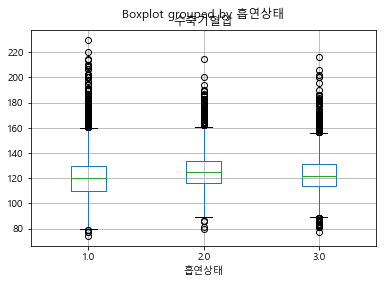

In [15]:
#흡연상태에 따른 고혈압 : 수축기 혈압, 이완기 혈압 -> boxplot

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

health_data.boxplot(column='수축기혈압', by='흡연상태')

In [34]:
df1 = health_data.loc[health_data['수축기혈압']>=140]
print(df1.shape)
df1.head(2)

(7309, 28)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석
6,2016,68,2,16,46,145.0,40.0,74.0,0.7,0.4,...,182.0,10.6,3.0,0.6,18.0,13.0,16.0,1.0,0,NaN
13,2016,151,1,11,41,185.0,80.0,92.0,0.8,0.7,...,142.0,16.7,1.0,1.0,22.0,33.0,50.0,1.0,0,NaN


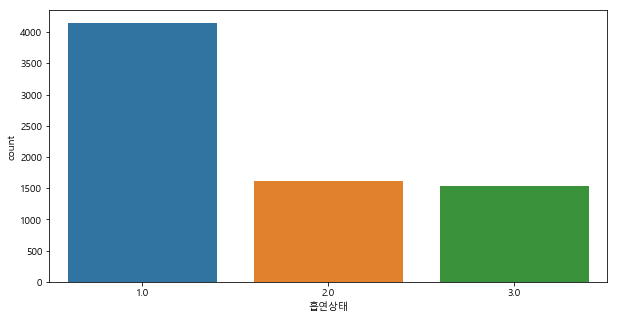

In [36]:
plt.figure(figsize=[10,5])
sns.countplot(data=df1,x='흡연상태')

In [16]:
for i in range(1,4) :
    if healt_data[health_data['흡연상태']==i]['수축기혈압'] >= 140:
        

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [29]:
(health_data['흡연상태'] == 1)['']

healt_data[health_data['흡연상태']==i]['수축기혈압'] >= 140

KeyError: ''

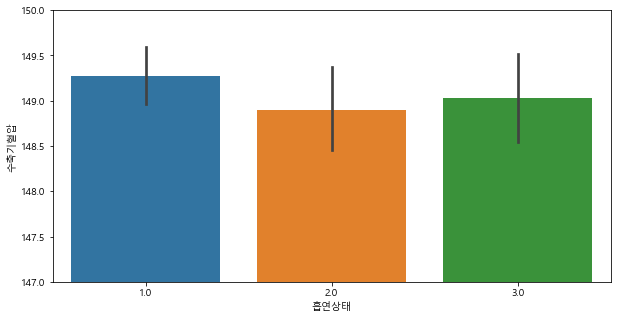

In [41]:
plt.figure(figsize=[10,5])
plt.ylim([147,150])
sns.barplot(data=df1,x='흡연상태',y='수축기혈압')

In [43]:
health_data['흡연경험'] = health_data['흡연상태'].replace(1,'비흡연').replace(2,'흡연').replace(3,'흡연')
health_data['흡연경험'].value_counts()

비흡연    42199
흡연     27783
Name: 흡연경험, dtype: int64

In [65]:
health_data.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '구강검진 수검여부', '치석', '흡연경험'],
      dtype='object')

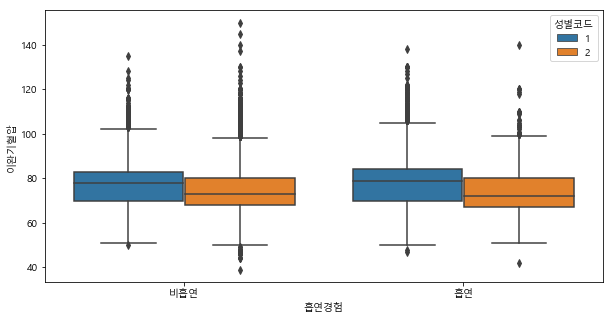

In [68]:
plt.figure(figsize=[10,5])
# plt.ylim([60,100])
sns.boxplot(data=health_data,x='흡연경험',y='이완기혈압',hue='성별코드')